

> What is an outlier ?
- An outlier is a data point in a data set the is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

> Criteria to identify an outlier?
- Data point that falls outside of 1.5 yimes of an interquartile range above the 3rd quartile and below the 1st quartile
- Data point that falls outside of 3 standard derivations. We can use a Z-score
falls outside of 2 standard deviation.


> Reason for outliers existence :
- variability in the data
- an experimental measurement error


> Impacts of outliers in a dataset :
- It causes various problems during our statistical analysis
- It may cause a significant impact on the mean and the standar deviation

> Various ways of finding outliers
- Using scatter plots
- Box plot
- Using 2-score
- Using the IQR interquantile range















> **Steps :**





> **Step 1 : Create a sample dataset**



In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [33]:
# creating a sample dataset
np.random.seed(42)
data = np.random.normal(loc=50,scale =10, size=100) # normal dtaa with mean=50, std=10
outliers = np.array([10,20,30,40,50,60,70,80,90,100,110]) # outliers
data = np.concatenate((data,outliers)) # adding outliers to the dataset

In [34]:
# creating a dataframe
df= pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [35]:
print(df.tail())

     Values
106    70.0
107    80.0
108    90.0
109   100.0
110   110.0




> **Steps 2 : Detecting oiutliers**





> **Using scatter plot : A scatter plot helps visualize identify extreme values.**



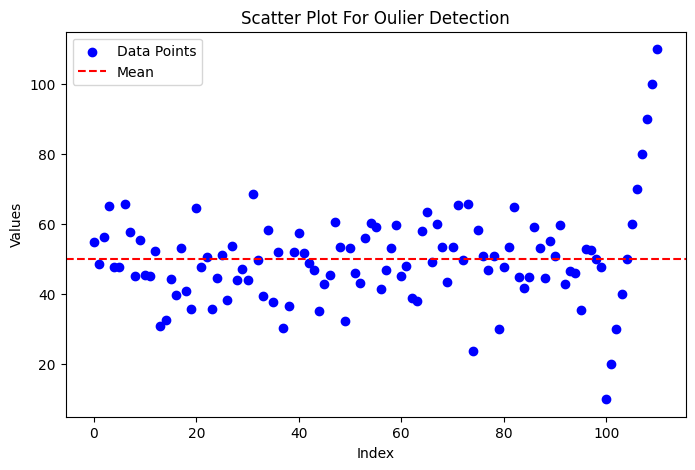

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data Points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
# plt.axhline(y=df['Values'].median(),color='green',linestyle='--',label='Median')
plt.title('Scatter Plot For Oulier Detection')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()



> **Box plot : A box plot is useful for spotting extreme values using quartiles.**



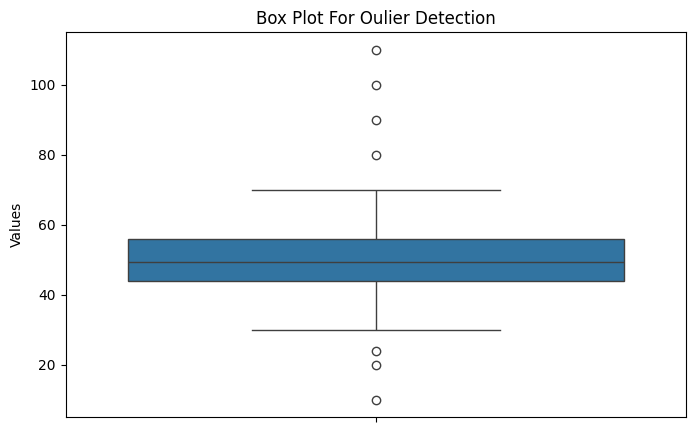

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title('Box Plot For Oulier Detection')
plt.show()



> **Z - Score** : The z-score method formula is z = x - mue / sigma,where
- x - data point
- mue - mean of the dataset
- sigma - standard deviation of the dataset





> Steps :
- Compute the z score for each data point.
- If zscore > 3 or zscore < -3, mark it as an outlier.






In [40]:
df['Z-Score']=zscore(df['Values'])
df['Outlier']=df['Z-Score'].apply(lambda x:'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier']== 'Outlier'])

     Values   Z-Score  Outlier
109   100.0  3.686593  Outlier
110   110.0  4.424730  Outlier




> **Interquatile Range (IQR) Method :**
- Formula : IQR = Q3 - Q1
Steps :
- Calculate Q1 (25th percentile) and Q3 (75th percentile)
- Compute IQR = Q3 - Q1
- Define lower and upper bounds :
  - Lower Bound = Q1 - 1.5 * IQR
  - Upper Bound = Q3 + 1.5 * IQR
- Any value outside these bounds in outlier

In [42]:
Q1 = df['Values'].quantile(0.25)
Q3 = df["Values"].quantile(0.75)
IQR = Q3-Q1
# defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# identifing outliers
df['Ouliers_IQR'] = df['Values'].apply(lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Normal')
print(df[df['Ouliers_IQR'] == 'Outlier'])

         Values   Z-Score  Outlier Ouliers_IQR
74    23.802549 -1.937823   Normal     Outlier
100   10.000000 -2.956640   Normal     Outlier
101   20.000000 -2.218503   Normal     Outlier
107   80.000000  2.210319   Normal     Outlier
108   90.000000  2.948456   Normal     Outlier
109  100.000000  3.686593  Outlier     Outlier
110  110.000000  4.424730  Outlier     Outlier




> Finding summary
- 1)scatter plot - Outliers appear far from the main cluster
- 2)Box plot - Outliers are outside the whiskers
- 3)Z-score - values with Z>3 or Z<-3 are outliers
- 4)IQR method - values outside [Q1-1.5IQR Q3+1.5IQR] are outliers


Finding Outliers Using the IQR Method with a 5-Number Summary The 5-number summary consists of:
- Minimum (Q0) → The smallest value in the dataset.
- First Quartile (Q1) → The 25th percentile (lower quartile).
- Median (Q2) → The 50th percentile (middle value).
-Third Quartile (Q3) → The 75th percentile (upper quartile).
- Maximum (Q4) → The largest value in the dataset. has context menu
- The Interquartile Range (IQR) is calculated as:
     -IQR=Q3−Q1
- Any value outside the range:
- [Q1−1.5×IQR,Q3+1.5×IQR] is considered an outlier.
- Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR



In [43]:
import numpy as np
np.random.seed(42)
data = np.random.normal(loc=50,scale=10,size=100)
outliers = np.array([10,110,5,120])
data = np.concatenate([data,outliers])

Q1 = np.percentile(data,25)
Q2 = np.median(data)
Q3 = np.percentile(data,75)
min_value= np.min(data)
max_value = np.max(data)

IQR = Q3 -Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"5-number summary : \n Min:{min_value}, Q1:{Q1}, Median (Q2)  : {Q2}, q3 : {Q3}, MAX:{max_value}")
print(f"IQR : {IQR}")
print(f'lower bound : {lower_bound}, upper boundf:{upper_bound}')
print(f"outliers : {outliers}")

5-number summary : 
 Min:5.0, Q1:43.874401021766715, Median (Q2)  : 48.73043708220287, q3 : 55.00852473036764, MAX:120.0
IQR : 11.134123708600924
lower bound : 27.17321545886533, upper boundf:71.70971029326903
outliers : [ 23.80254896  10.         110.           5.         120.        ]




> Blancing a dataset with downsampling :
- Imagine we have a dataset for a binary classification task where the class labels are imbalanced, and majority class to balance the dataset



In [45]:
import pandas as pd
from sklearn.utils import resample
df= pd.DataFrame({
'Age' : [22,25,27,28,30,35,40,45,50,55,60,65,70],
'Income':[2200,2500,2700,3200,3500,3800,4000,4200,4300,4500,5000,5500,6000],
'Class':['High','Low','Low','High','High','Low','High','High','Low','Low','High','High','Low']
})



> High Class has 7 instances

> Low class has 6 instances





In [49]:
df_high = df[df['Class']=='High']
df_low = df[df['Class']=='Low']
print(df_high)
print(df_low)

    Age  Income Class
0    22    2200  High
3    28    3200  High
4    30    3500  High
6    40    4000  High
7    45    4200  High
10   60    5000  High
11   65    5500  High
    Age  Income Class
1    25    2500   Low
2    27    2700   Low
5    35    3800   Low
8    50    4300   Low
9    55    4500   Low
12   70    6000   Low


In [47]:
df_high_downsampled = resample(df_high,replace=False,n_samples=len(df_low),random_state=42)

In [48]:
df_balanced = pd.concat([df_high_downsampled,df_low])

In [50]:
print(df_balanced['Class'].value_counts())

Class
High    6
Low     6
Name: count, dtype: int64




> **Upsampling the minority class**



In [54]:
df_high = df[df['Class']=='High']
df_low = df[df['Class']=='Low']
print(df_high)
print(df_low)

    Age  Income Class
0    22    2200  High
3    28    3200  High
4    30    3500  High
6    40    4000  High
7    45    4200  High
10   60    5000  High
11   65    5500  High
    Age  Income Class
1    25    2500   Low
2    27    2700   Low
5    35    3800   Low
8    50    4300   Low
9    55    4500   Low
12   70    6000   Low


In [57]:
df_low_upsampled = resample(df_low,replace=True,n_samples=len(df_high),random_state=42)

In [58]:
df_balanced = pd.concat([df_high,df_low_upsampled])

In [60]:
print(df_balanced['Class'].value_counts())

Class
High    7
Low     7
Name: count, dtype: int64




> **SMOTE (Synthetic Minority Over-Sampling Technique) to balance the dataset. SMOTE generates synthetic examples rather than simply duplicating existing ones.**
- 1. SMOTE to generate synthetic samples instead of duplicating existing ones.
- 2. Convert categorical class labels into numeric form for SMOTE to work
- 3.Apply SMOTE to balance the dataset
- 4. Convert back to original categorical labels.
- 5. Combine the resampled data into a final balanced dataset



In [73]:
pip install imbalanced-learn

In [74]:
import pandas as pd
from imblearn.over_sampling import SMOTE

In [75]:
df= pd.DataFrame({
    'Age':[22,25,27,28,30,35,40,45,50,55,60,65,70],
    'Income':[2200,2500,2700,3200,3500,3800,4000,4200,4300,4500,5000,5500,6000],
    'Class':['Minority','Majority','Majority','Majority','Majority',
             'Minority','Minority','Minority','Majority','Majority',
             'Majority','Majority','Majority']
})

In [76]:
df['Class']=df['Class'].map({'Majority':0,'Minority':1})

In [78]:
x = df[['Age','Income']]
y = df['Class']
smote = SMOTE(sampling_strategy='auto', random_state=42,k_neighbors=3)
x_resampled,y_resampled = smote.fit_resample(x,y)
y_resampled=y_resampled.map({0:'Majority',1:'Minority'})
df_balanced=pd.concat([pd.DataFrame(x_resampled,columns=['Age','Income']),pd.DataFrame(y_resampled,columns=['Class'])],axis=1)
print(df_balanced['Class'].value_counts())
print(df_balanced)


Class
Minority    9
Majority    9
Name: count, dtype: int64
    Age  Income     Class
0    22    2200  Minority
1    25    2500  Majority
2    27    2700  Majority
3    28    3200  Majority
4    30    3500  Majority
5    35    3800  Minority
6    40    4000  Minority
7    45    4200  Minority
8    50    4300  Majority
9    55    4500  Majority
10   60    5000  Majority
11   65    5500  Majority
12   70    6000  Majority
13   40    4031  Minority
14   35    3831  Minority
15   44    4176  Minority
16   35    3826  Minority
17   41    4040  Minority
